# Processamento Digital de Imagens

1001527 - Turma A

Prof. Cesar Henrique Comin

## Sistema para desenhar no ar com um objeto colorido

### Equipe
Igor Teixeira Machado RA: 769708

Rafael Vinícius Passador RA: 790036

* pip install opencv-python
* pip install numpy
* python -m pip install scipy

In [96]:
import cv2
import numpy as np
import scipy.ndimage as ndi
import matplotlib.pyplot as plt

In [97]:
def process_frame(img):

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray = img_gray.astype(float)
    grad_mag = ndi.gaussian_gradient_magnitude(img_gray, sigma=2)
    grad_mag_norm = grad_mag - np.min(grad_mag)
    grad_mag_norm = 255 * grad_mag_norm / np.max(grad_mag_norm)
    grad_mag_norm = np.round(grad_mag_norm).astype(np.uint8)

    return grad_mag_norm

def detect_object(frame):

    # Convertendo para HSV.
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Escolhendo limites para a detecção da cor do objeto verde.
    lower_bound = np.array([200,200,100]) 
    upper_bound = np.array([0,0,100])

    # Aplicando os limites.
    mask = cv2.inRange(hsv, lower_bound, upper_bound)

    # Definindo o tamanho do kernel.
    kernel = np.ones((7,7), np.uint8)

    # Removendo ruídos desnecessários
    # aplicando o fechamento e depois a abertura na máscara.
    # mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    # mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

    plt.imshow(mask, cmap='gray')
    plt.show()
    return mask

def mass_center(coord):

    x = coord[:, 0]
    y = coord[:, 1]
    x_mean = int(np.rint(np.mean(x)))
    y_mean = int(np.rint(np.mean(y)))

    return (x_mean, y_mean)

def draw_circle(image, coord, radius=5, color=(0, 0, 255), thickness=-1):

    # cor: BGR
    image = cv2.circle(image, coord, radius, color, thickness)

    return image

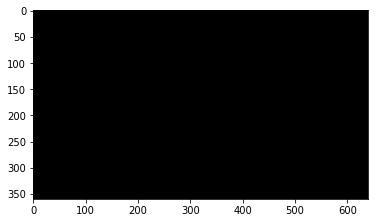

(0, 0)


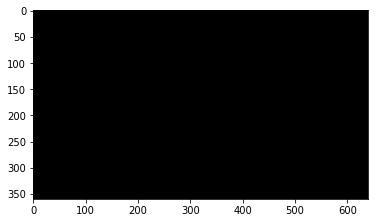

(0, 0)


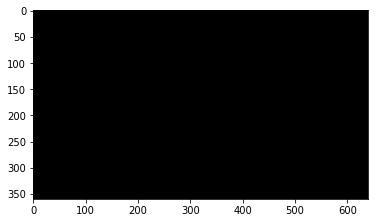

(0, 0)


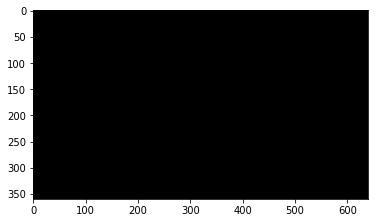

(0, 0)


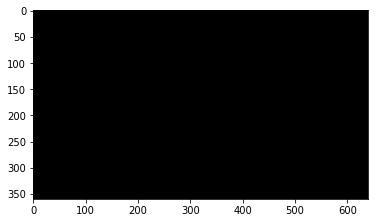

(0, 0)


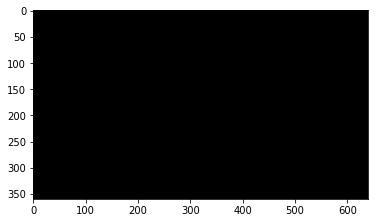

(0, 0)


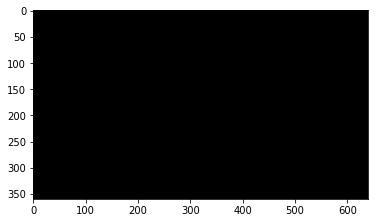

(0, 0)


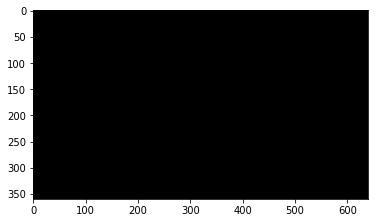

(0, 0)


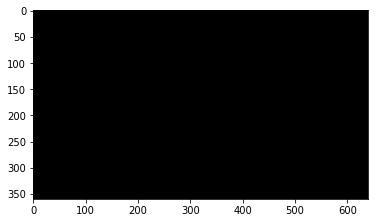

(0, 0)


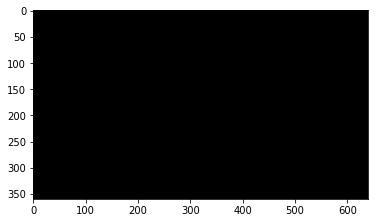

(0, 0)


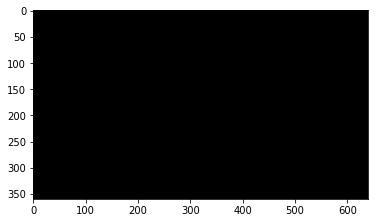

(0, 0)


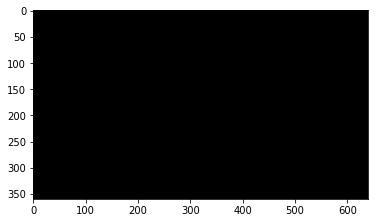

(0, 0)


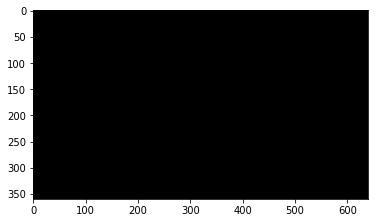

(0, 0)


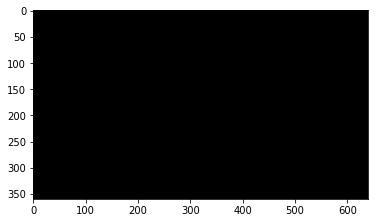

(0, 0)


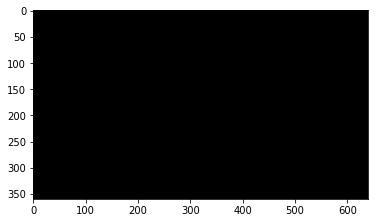

(0, 0)


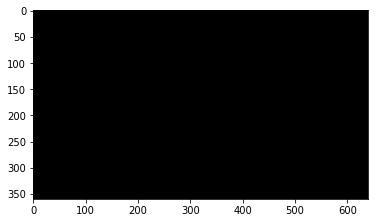

(0, 0)


-1

In [98]:
# Abre dispositivo de captura. O parâmetro 0 faz com que
# a primeira câmera encontrada seja utilizada
vcap = cv2.VideoCapture(0)

while True:
    ret, curr_frame = vcap.read()
    if ret:
        # Redimensionamos a imagem para diminuir o custo computacional
        # necessário para processar o frame
        resized_frame = cv2.resize(curr_frame, (640, 360))
        #print(resized_frame.shape)
        #processed_frame = process_frame(resized_frame)
        coord = detect_object(resized_frame)
        
        object_mass_center = mass_center(coord)
        print(object_mass_center)
        processed_frame = draw_circle(resized_frame, object_mass_center)
               
        cv2.imshow('frame', processed_frame)
    else:
        print("Frame not available")

    # Esperar 33 milisegundos significa mostrar 30 imagens por segundo (1/0.033).
    # Portanto, o FPS (frames per second) do vídeo mostrado será aproximadamente 30.
    # O valor não é exatamente 30 porque um tempo é gasto no processamento do frame
    key = cv2.waitKey(33) & 0xff

    if key == 27:
        break

vcap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)